In [15]:
# numpy installieren 
!pip install numpy
# https://numpy.org/install/#python-numpy-install-guide
# importieren der numpy Library mit der Abkuerzung np
# um nicht immer numpy schreiben zu muessen
import numpy as np


# qutip installieren
!pip install qutip numpy
# http://qutip.org/docs/4.1/installation.html
# Von der Library qutip werden nur die Funktionen Bloch() und basis() importiert
from qutip import Bloch, basis

# importieren der Python eigene Mathematik Library
import math

# Beispielseite zu qutip
# http://qutip.org/docs/3.1.0/guide/guide-bloch.html

## Erstellen einer leeren Blochkugel

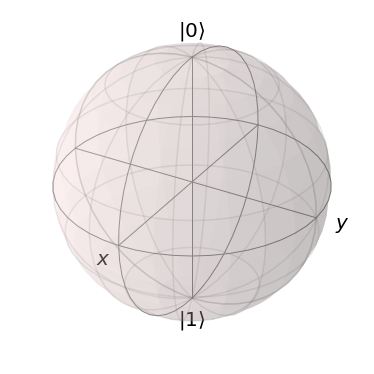

In [6]:
# %% -1-
# Bloch() erzeugt eine Bloch
# mit b verweisen wir spaeter auf diese 
b = Bloch() 

# b.show() zeigt die aktuelle Blochkugel an
b.show()

## Einfuegen von Vektoren

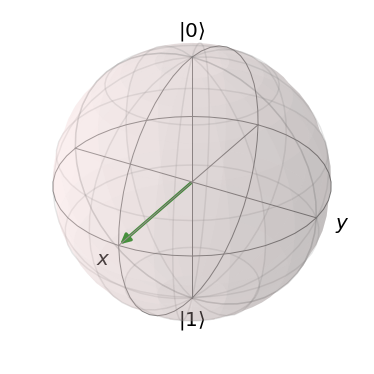

In [7]:
# %% -2-
# hinzufuegen eines Vektor
#  x,y,z
v=[1,0,0] # dazu geben wir einen Vektor in die x-Richtung an
b.add_vectors(v) # mit b.add_vectors wird der Vektor v der Blochkugel hinzugefuegt
b.show() 

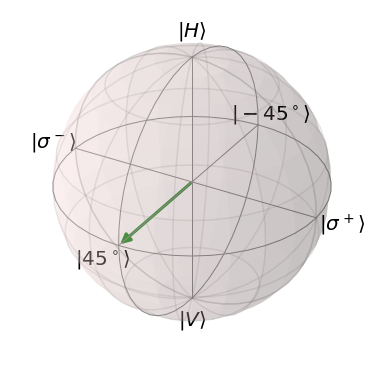

In [8]:
# %% -3-
# Achsen koennen auch umbenannt werden 
# dazu kann Latex-Code verwendet werden jedoch muss beachtet werden,
# dass fuer Latex-Code \ --> \\ verwendet werden sollte 
b.xlabel = ["$\\left|45^\\circ \\right>$","$\\left|-45^\\circ \\right>$"]
b.ylabel = ["$\\left|\\sigma^+\\right>$","$\\left|\\sigma^- \\right>$"]
b.zlabel = ["$\\left|H\\right>$","$\\left|V\\right>$"]
b.show()

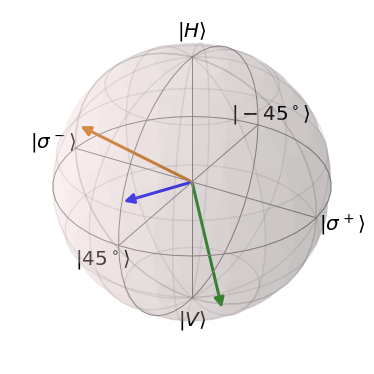

In [9]:
# %% -4-
b.clear() # Loescht alle Zustaende auf der Blochkugel 
# behaltet jedoch Einstellungen wie z.B. Achsenbeschriftung

# Normierung eines Vektors
v=[1/math.sqrt(3),1/math.sqrt(3),-1/math.sqrt(3)]
w=[1,-1,1]/np.sqrt(3)

# automatische Normierung eines Vektors
# mittel der numpy Library  
# u@u.T ist dabei eine Vektor-Vektor Multiplikation
# wobei der hintere Vektor zuerst transponiert werden muss ('.T) 
u=np.array([3,0,1])
u=u/np.sqrt(u@u.T) 

# Es koennen auch mehrere Vektoren gleichzeitig hinzugefuegt werden
b.add_vectors([v,w,u])
b.show()

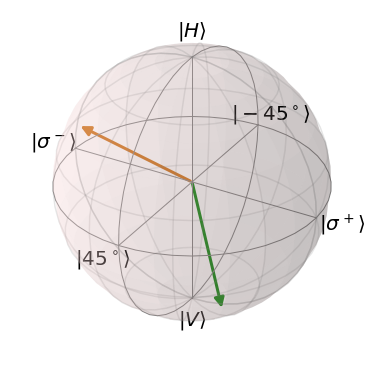

In [10]:
# %% -5-
# geht auch indem z.B. w mit [1,-1,1]/np.sqrt(3) ersetzt wird
b.clear()
b.add_vectors([v,[1,-1,1]/np.sqrt(3)])

b.show()

## Verwenden von Basiszustaenden

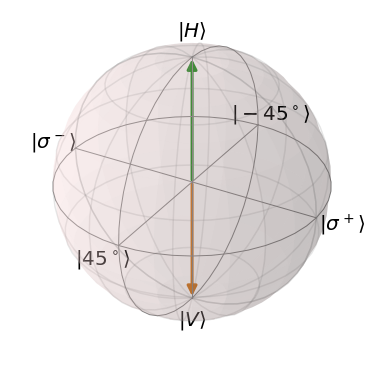

In [11]:
# %% -6-
b.clear()
# Anstatt Vektoren einzugeben kann man sich auch 
# die Basiszustaende verwenden
up   = basis(2,0)     # entspricht |0> bzw. |H>
down = basis(2,1)     # entspricht |1> bzw. |V>
# jetzt muss jedoch add_states() verwendet werden
# aber auch hier funktioniert wieder add_states(up) 
# oder das hinzufuegen einer Liste [up, down] 
b.add_states([up,down])
b.show()

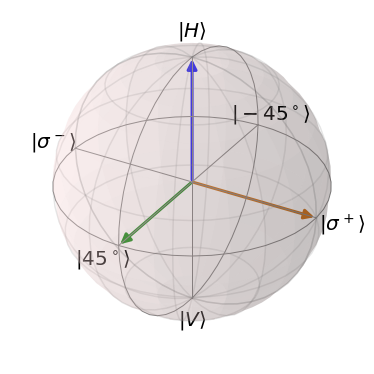

In [12]:
# %% -7-
b.clear()
# diese Basen koennen auch kombiniert werde
# (<Zustand>).unit() uebernimmt hier die Normalisierung
# j wird hier als ersatz fuer imaginaer (i) verwendet
x = (up        +(1+0j)*down      ).unit()
y = (basis(2,0)+(0+1j)*basis(2,1)).unit()
z = (basis(2,0)+(0+0j)*basis(2,1)).unit()

b.add_states([x,y])
b.add_states(z)
b.show()

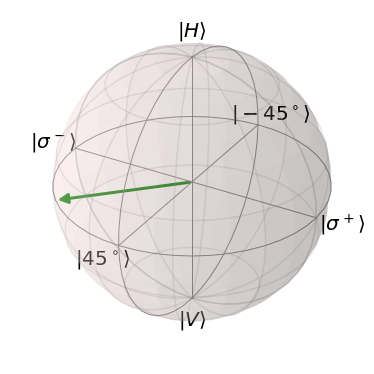

In [13]:
# %% -8-
b.clear()
# genauso kann die Exponentialfunktion und Sinus, Cosinus verwendet werden
# BSP 5 vom 5. Nov
psi = (np.cos(np.pi/4)*up + np.sin(np.pi/4)*np.exp(-1j*np.pi/4)*down).unit()
b.add_states(psi)
b.show()
b.save('bloch.png') # erzeug ein Bild des aktuellen Zustandes

### Um das Beipsiel 5 vom 5 Nov als Bild zu erhalten, wuerden folgende Zeile ausreichen:
(koennte auch noch kompakter geschrieben werden)

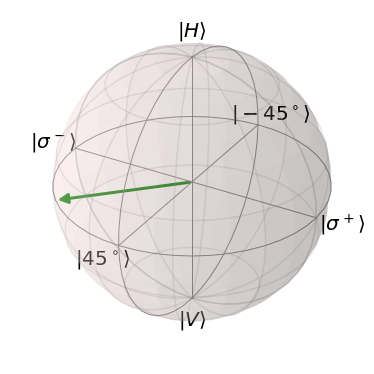

In [14]:
from qutip import Bloch, basis
import numpy as np
b = Bloch()
up   = basis(2,0)
down = basis(2,1)
psi = (np.cos(np.pi/4)*up + np.sin(np.pi/4)*np.exp(-1j*np.pi/4)*down).unit()
b.add_states(psi)
b.xlabel = ["$\\left|45^\\circ \\right>$","$\\left|-45^\\circ \\right>$"]
b.ylabel = ["$\\left|\\sigma^+\\right>$","$\\left|\\sigma^- \\right>$"]
b.zlabel = ["$\\left|H\\right>$","$\\left|V\\right>$"]
b.show()
# b.save('bloch_5a.png')